# Result Explorer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from process import virus_gene_rate_by_generation, fitness_by_generation

## Settings

In [2]:
sns.set('paper', 'white', font_scale=1.5,
        rc={'xtick.bottom': True,
            'xtick.direction': 'out',
            'ytick.direction': 'out',
            'ytick.left': True})
sns.set_palette(['steelblue','lightcoral','maroon'])
pd.options.display.precision = 2
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
os.makedirs('img', exist_ok=True)
fmts = ['png', 'eps']

## Experiment on Knowledge Gene Rate in Population

In [4]:
problems = ['02', '04', '14', '27']
problem_names = ['SL', 'CSL', 'CO', 'MD']
seeds = range(1001, 1021)
comparison1 = ['rand_goodv', 'rand_mixv', 'adapt_mixv']
label1 = ['Rand+Tested-good', 'Rand+Mixed', 'Adapt+Mixed']
comparison2 = ['adapt_mixv']
label2 = ['K(5,5)+Adapt']

In [5]:
with open('dat.kgene.rate.csv', 'w') as f:
    f.write(
        'problem;method;seed;generation;fitness;rate\n'
    )
with open('dat.kgene.rate.csv', 'a') as f:
    for problem, problem_name in zip(problems, problem_names):
        for method, label in zip(comparison1, label1):
            for seed in seeds:
                try:
                    rates = virus_gene_rate_by_generation(
                        f'{problem}/dat/{method}{seed}.log',
                        300
                    )
                    fitnesses = fitness_by_generation(
                        f'{problem}/dat/{method}{seed}.log',
                        300
                    )
                    for i, (rate, fit) in enumerate(zip(rates, fitnesses)):
                        f.write(
                            '{};{};{};{};{};{}\n'.format(
                                problem_name,
                                label,
                                seed,
                                i+1,
                                fit,
                                rate
                            )
                        )
                except Exception as e:
                    print(str(e))
dat = pd.read_csv('dat.kgene.rate.csv', delimiter=';')
dat.head(3)

,problem,method,seed,generation,fitness,rate
0,SL,Rand+Tested-good,1001,1,418.0,0.00
1,SL,Rand+Tested-good,1001,2,245.0,0.02
2,SL,Rand+Tested-good,1001,3,245.0,0.04


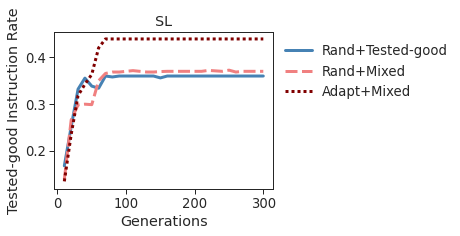

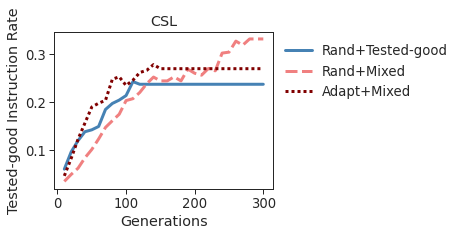

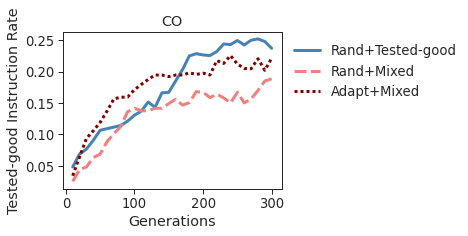

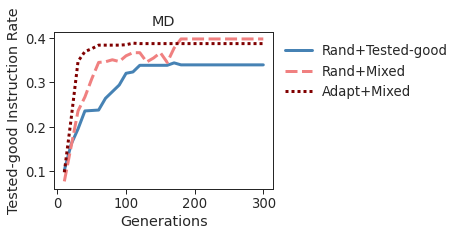

In [6]:
for problem_name in problem_names:
    plt.figure(figsize=(6.4, 3.2))
    ax = sns.lineplot(
        x='generation',
        y='rate',
        data=dat[(dat.problem==problem_name) & (dat.generation%10==0)],
        hue='method',
        style='method',
        estimator=np.median,
        err_style=None,
        linewidth=3
    )
    ax.set_title(f'{problem_name}')
    ax.set_xlabel('Generations')
    ax.set_ylabel('Tested-good Instruction Rate')
    leg = ax.legend(
        bbox_to_anchor=(1., 1.),
        loc='upper left',
        facecolor='none',
        framealpha=0.
    )
    for line in leg.get_lines():
        line.set_linewidth(3)
    plt.subplots_adjust(right=0.6, bottom=0.2)
    for fmt in fmts:
        plt.savefig(f'img/kgene.rate.{problem_name}.{fmt}', dpi=600)
    plt.show()

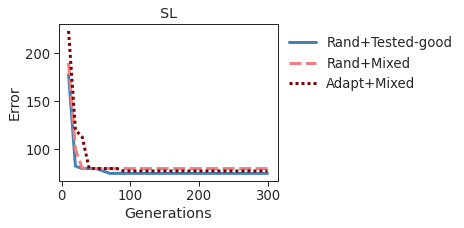

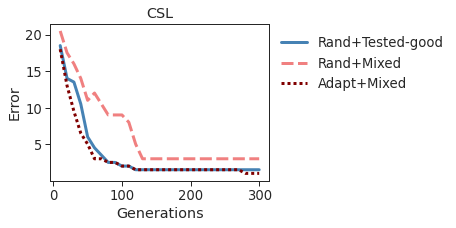

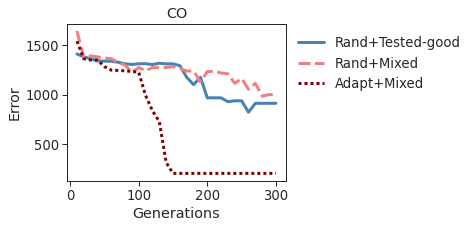

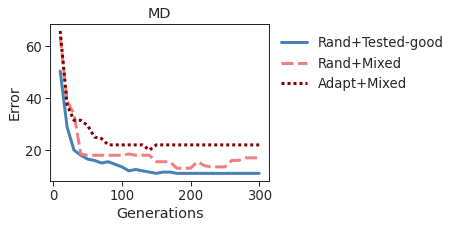

In [7]:
for problem_name in problem_names:
    plt.figure(figsize=(6.4, 3.2))
    ax = sns.lineplot(
        x='generation',
        y='fitness',
        data=dat[(dat.problem==problem_name) & (dat.generation%10==0)],
        hue='method',
        style='method',
        estimator=np.median,
        err_style=None,
        linewidth=3
    )
    ax.set_title(f'{problem_name}')
    ax.set_xlabel('Generations')
    ax.set_ylabel('Error')
    leg = ax.legend(
        bbox_to_anchor=(1., 1.),
        loc='upper left',
        facecolor='none',
        framealpha=0.
    )
    for line in leg.get_lines():
        line.set_linewidth(3)
    plt.subplots_adjust(right=0.6, bottom=0.2)
    for fmt in fmts:
        plt.savefig(f'img/kgene.fitness.{problem_name}.{fmt}', dpi=600)
    plt.show()